![Screenshot 2023-02-07 at 15.55.22](Screenshot%202023-02-07%20at%2015.55.22.png)


# Credit Approval Analysis

Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page


## The story behind The Data

Credit score cards are a common risk control method in the financial industry. 
The industry uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. 
The bank is able to decide whether to issue a credit card to the applicant. 
Credit scores can objectively quantify the magnitude of risk. 
As such, in this scenario, our bank HereIsTheMoney would like to find out what are the main factors that allow them to approve or deny a credit card to a client, and ultimately have an automated logic to identify these cases before they come to light, thus saving costs as well as increasing its reputation at the same time.

**A full ERD can be found [here](https://dbdiagram.io/d/638ce1b7bae3ed7c45449f75)**

# Data Description
In this task, few datasets are provided:

1. **`application_record.csv` -** this file contains appliers personal information, which you could use as features for data enrichment, in order to get better insights on the business use-case. The file contains ~438K records, and 18 columns.
The relevant columns this file has are:

	- `ID` - client number. Unique identifier for the customer holding the account
    - `AMT_INCOME_TOTAL` - annual income
    - `NAME_INCOME_TYPE` - income category
    - `NAME_EDUCATION_TYPE` - education level
    - `NAME_FAMILY_STATUS` - martial status
    - `NAME_HOUSING_TYPE` - way of living
    - `DAYS_BIRTH` - Count backwards from current day (0), -1 means yesterday
    - `DAYS_EMPLOYED` - Start date of employment; Count backwards from current day(0). If positive, person unemployed.
    - `OCCUPATION_TYPE` - Occupation
    
2. **`credit_record.csv` -** contains records users transactions of credit card. This dataset contains ~200K transactions, and has 3 columns:

    - `ID` - Client number
    - `MONTHS_BALANCE` - Record month; The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
    - `STATUS` - Status; A mapping column between a numerical value, and a range of time past due. Specifically - 0: 1-29 days past due; 1: 30-59 days past due; 2: 60-89 days overdue; 3: 90-119 days overdue; 4: 120-149 days overdue; 5: Overdue or bad debts, write-offs for more than 150 days; C: paid off that month X: No loan for the month

3. **`enriched_demographics_client.csv`** - this dataset contains some additional demographic information about each client. Specifically, it contains:
 
     - `ID` - Client number
     - `CODE_GENDER` - M (male) / F (female) of the client’s identity
     - `CNT_CHILDREN` - number of children
     - `CNT_FAM_MEMBERS` - Family size

4. ****`enriched_flags_client.csv`**** - this dataset contains some additional flags about each client. Specifically, it contains:
    - `ID` - Client number
    - `FLAG_MOBIL` - Is there a mobile phone
    - `FLAG_WORK_PHONE` - Is there a work phone
    - `FLAG_PHONE` - Is there a phone
    - `FLAG_EMAIL` - Is there an email
    - `FLAG_OWN_CAR` - Y (yes) / N (no) flag indicates if the client has a car
    - `FLAG_OWN_REALTY` - Y(yes) / N (no) indicates if the client has a property

# SQL tasks

1. How many clients that have more then 2 children does the bank have?
2. What is the average family size per each occupation type (based on fam_members)?
3. Out of the men clients, what is the count of transaction that were made, per each fam_member value (hint: treat fam_members as a dimension, not a metric)?
4. The bank is interested in knowing per each “status” (see above), who are the client IDs with top-5 highest AMT_INCOME_TOTAL, as well as the bottom-5 lowest AMT_INCOME_TOTAL. Please help him find that.
5. Let’s define a new column called “has_car_and_realty”. The bank thinks these people are affluent compared to others. Its logic is as follows:
- If flag_own_car = 1 and flag_own_realty = 1 ⇒ 1
- else ⇒ 0
Once we have this column, the bank would like to know per each has_car_and_realty category:

    1. how many unique clients do we have, 
    2. as well as how many transactions each category (1, 0) have had, 
    3. and what is the ratio between the two: unique_clients / num_transactions

In [1]:
-- Start writing your SQL query here 

SELECT * from credit_record LIMIT 10

,id,months_balance,status
0,5125455,-30,0
1,5022624,-19,0
2,5126653,-44,0
3,5143589,-40,0
4,5026151,0,0
5,5142488,-36,0
6,5142515,-45,0
7,5009989,-46,0
8,5045042,-18,0
9,5118446,-4,0


## Tableau Tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualisations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - Number of bank clients
    - % of clients with higher education
    - etc.
2. **A Bar Chart**, for example, comparing the number of clients in each client segment (custom defined as a combination of demographic characteristics).
3. **A Stacked Bar Chart with Quick Table Calculation**, for example, for each Family Status comparing the ratio of car owners and non-car owners.
4. **A Highlight Table (Heatmap)**, for example, between education and income level (can be custom-defined based on Amt Income Total), where each cell corresponds to absolute or relative numbers of clients in each combination. 
5. **A Circle View** with three different values on X axis, Y axis, and Size.
6. **A Pareto Analysis** based on a custom-defined **client segment** to answer a question: Which client segments make up 80% of all client base? 
    - Segment can include values from the demographic and/or record information about the client. For example, Education | Income | Marital status | Owning a car | No children.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard.
8. At least **1 more visualization of your choice** adding value to your analysis.

_Use this cell to add your Tableau links. We encourage you also to add here screenshots from your Tableau dashboard with explanations._


_For_ deep dive analysis and EDA follow the guidelines on project [Page](https://cms.master.school/final-project-jan23)

# **SQL**

In [2]:
-- 1. How many clients that have more then 2 children does the bank have?
SELECT COUNT(DISTINCT id) as  client_with_more_than_2_children
FROM enriched_demographics_client 
WHERE cnt_children > 2;

,client_with_more_than_2_children
0,6075


In [3]:
-- 2. What is the average family size per each occupation type (based on fam_members)?
SELECT occupation_type,
        AVG(cnt_fam_members) as avg_family_size
FROM application_record a
JOIN enriched_demographics_client e
ON a.id = e.id
GROUP BY occupation_type
ORDER BY occupation_type;

,occupation_type,avg_family_size
0,Accountants,2.263039
1,Cleaning staff,2.069950
2,Cooking staff,2.247215
3,Core staff,2.337068
4,Drivers,2.407358
5,High skill tech staff,2.244001
6,HR staff,2.020672
7,IT staff,1.973510
8,Laborers,2.322190
9,Low-skill Laborers,2.257944


In [4]:
-- 3. Out of the men clients, what is the count of transaction that were made, per each fam_member value (hint: treat fam_members as a dimension, not a metric)?
SELECT DISTINCT a.id,
        a.num_transact,e.cnt_fam_members,
        1.0*a.num_transact/e.cnt_fam_members AS transact_per_fam_member     
FROM (
        SELECT c.id,
                COUNT(c.status) AS num_transact
        FROM credit_record c
        GROUP BY c.id
     ) AS a
JOIN enriched_demographics_client e
ON a.id = e.id
WHERE e.code_gender = 'M'
ORDER BY transact_per_fam_member DESC;

,id,num_transact,cnt_fam_members,transact_per_fam_member
0,5066706,21,1,21.000000
1,5046135,17,1,17.000000
2,5061100,17,1,17.000000
3,5067193,17,1,17.000000
4,5068953,17,1,17.000000
...,...,...,...,...
10783,5053512,1,6,0.166667
10784,5111167,1,6,0.166667
10785,5135534,1,7,0.142857
10786,5135536,1,7,0.142857


In [5]:
-- 4. The bank is interested in knowing per each “status” (see above), who are the client IDs with top-5 highest AMT_INCOME_TOTAL, as well as the bottom-5 lowest AMT_INCOME_TOTAL. Please help him find that. 

WITH top_5 AS ( SELECT DISTINCT a.id, c.status, a.amt_income_total , 
                       DENSE_RANK() OVER(PARTITION BY c.status ORDER BY a.amt_income_total DESC,a.id ASC)AS row_num 
                FROM application_record a 
                JOIN credit_record c 
                ON c.id=a.id
               ),
    
    bottom_5 AS ( SELECT DISTINCT a.id, c.status, a.amt_income_total , 
                         DENSE_RANK() OVER(PARTITION BY c.status ORDER BY a.amt_income_total ASC, a.id ASC)AS row_num 
                   FROM application_record a 
                   JOIN credit_record c 
                   ON c.id=a.id
                )
 
SELECT DISTINCT id,status,amt_income_total AS total_income 
        FROM top_5 
        WHERE row_num <=5
        
UNION 

SELECT DISTINCT id,status,amt_income_total AS total_income
        FROM bottom_5 
        WHERE row_num <=5
ORDER BY status ASC, total_income DESC;


,id,status,total_income
0,5143236,0,1575000.0
1,5143237,0,1575000.0
2,5143235,0,1575000.0
3,5143232,0,1575000.0
4,5143234,0,1575000.0
...,...,...,...
75,5088975,X,31500.0
76,5146562,X,31500.0
77,5088968,X,31500.0
78,5045657,X,30150.0


In [6]:
/* 5. Let’s define a new column called “has_car_and_realty”. The bank thinks these people are affluent compared to others. Its logic is as follows:
If flag_own_car = 1 and flag_own_realty = 1 ⇒ 1
else ⇒ 0
Once we have this column, the bank would like to know per each has_car_and_realty category:

1. how many unique clients do we have, 
2. as well as how many transactions each category (1, 0) have had, 
3. and what is the ratio between the two: unique_clients / num_transactions */

SELECT CASE WHEN flag_own_car = 'Y' and flag_own_realty = 'Y' 
                            THEN 'Have both' ELSE 'Not have both' END AS has_both,
       COUNT(DISTINCT id) AS uniq_clients,
       COUNT(*) AS transactions,
       ROUND(1.0*COUNT(DISTINCT id)/(SELECT COUNT(*) FROM enriched_flags_client),2) AS ratio
FROM enriched_flags_client
GROUP BY has_both;

,has_both,uniq_clients,transactions,ratio
0,Have both,112951,112956,0.26
1,Not have both,325572,325601,0.74


# **Tableau**

1. _**At least 2 KPIs as Big Ass Numbers**_. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
- Number of bank clients
- % of clients with higher education
- etc.


Tableau link: [Bank KPI's](https://public.tableau.com/app/profile/amulya3270/viz/Capstone2KPIs/Capstone_2_1_KPI)

![Screenshot 2023-02-08 at 18.37.41](Screenshot%202023-02-08%20at%2018.37.41.png)


The KPI's in the above visualization shows :
- **Bank clients** : 438510
- **Higher Education percentage** : 26.80%
- **Secondary Education percentage** : 68.82%
- **Clients with Two or more kids** : 3389
- **Clients with Car & Realty percentage** : 1.89%
- **Female clients percentage** : 21857
- **Male Clients percentage** : 10788

2. **_A Bar Chart_**, for example, comparing the number of clients in each client segment (custom defined as a combination of demographic characteristics).

Tableau link: [Bar Chart](https://public.tableau.com/app/profile/amulya3270/viz/Capstone_2_2_Barchart/Sheet2?publish=yes)

![Screenshot 2023-02-08 at 18.42.55](Screenshot%202023-02-08%20at%2018.42.55.png)


The above Barchart shows the number of clients that are female and male, How many family members each gender has and Number of kids in each family type. It shows the count of distinct clients. There are most female clients i.e, 149,415 that has 2 family members and no kids.

3. _**A Stacked Bar Chart**_ with Quick Table Calculation, for example, for each Family Status comparing the ratio of car owners and non-car owners.

Tableau Link : [Heatmap](https://public.tableau.com/app/profile/amulya3270/viz/Capstone_2_3_Stacked_Barchart/Sheet3?publish=yes)

![Screenshot 2023-01-23 at 16.16.50](Screenshot%202023-01-23%20at%2016.16.50.png)


The above Stacked Barchart shows the percentage of clients in each family type. This also shows does the client in each family type have car or not with two distinct colours. Married clients contribute to 66.14% with both car and no car category.

4. _**A Highlight Table (Heatmap)**_, for example, between education and income level (can be custom-defined based on Amt Income Total), where each cell corresponds to absolute or relative numbers of clients in each combination.

Tableau Link : [Heatmap](https://public.tableau.com/app/profile/amulya3270/viz/Capstone_2_4_Heatmap/Incomeleveleducation?publish=yes)

![Screenshot 2023-02-08 at 18.55.14](Screenshot%202023-02-08%20at%2018.55.14.png)


The above Heatmap shows the income level, Education type with the count of distinct number of clients in each category. Here each education type is represented by different colours. The clients with secondary education has lowest income with most number of clients i.e, 279,978.

5. _**A Circle View**_ with three different values on X axis, Y axis, and Size.


Tableau link : [Circle view](https://public.tableau.com/app/profile/amulya3270/viz/Capstone_2_5_Circle_view/Sheet4?publish=yes)

![Screenshot 2023-02-08 at 19.04.32](Screenshot%202023-02-08%20at%2019.04.32.png)


The above Circle view shows the relationship between months balance of each occupation type. Here the type of credit balance is shown using different colours for different status:
- 0 : 1-29 days past due
- 1 : 30-59 days past due
- 2 : 60-89 days past due
- 3 : 90-119 days past due
- 4 : 120-149 days past due
- 5 : >150 days past due
- X : No loan
- C : Paid off
Private sector staff has most negative months balance with 60-89 days past due of credits.
Waiters has the zero months balance with >150 days past due/ bad debts

6. _**A Pareto Analysis**_ based on a custom-defined client segment to answer a question: Which client segments make up 80% of all client base?
- Segment can include values from the demographic and/or record information about the client. For example, Education | Income | Marital status | Owning a car | No children.

Tableau link : [Pareto view](https://public.tableau.com/app/profile/amulya3270/viz/Capstone_2_6_Pareto_view/Sheet5?publish=yes)

![Screenshot 2023-02-08 at 19.18.54](Screenshot%202023-02-08%20at%2019.18.54.png)


The above Pareto view shows the relationship between Family status, Education type and the average amount of income earned. Also, there is an average income line chart which shows the percentage of income across table with education and family status. The clients with Academic level of education and are civil married has 307500 of average income total and the total income summed across is 5221978  

7. _**At least 1 parameter**_ that allows dashboard user to interact with the dashboard.

Tableau link : [Dashboard](https://public.tableau.com/app/profile/amulya3270/viz/Capstone_2_7_Parameter/Sheet8?publish=yes)

![Screenshot 2023-01-24 at 15.08.23](Screenshot%202023-01-24%20at%2015.08.23.png)


The above Stacked bar chart shows relationship between Car, Realty, Education, Family, Occupation, Housing, Income levels and Number of clients. The distinct colors represents gender of clients.
- **Car** : Female clients 16,184 with no car and 5,673 with car.
 		Male clients 3,912 with no car and 6,876 with car
- **Realty** : Female clients 14,998 with Realty and 6,859 with no Realty
 		   Male clients 6,847 with Realty and 3,941 with no Realty
- **Education Type** : Female clients 14,799 with secondary education and 23 with Academic degree
 		           Male clients 7,295 with secondary education and 122 lower secondary education
- **Family status** : Female clients 14,365 are married and 1,311 are widow
 		          Male clients 8,239 are married and 24 are widow
- **Housing Type** : Female clients 19,825 are in House/Appartment and 67 are in Co-op Apartment
 		         Male clients 9,322 are in House/Appartment and 71 are in Co-op Apartment
- **Occupation Type**: Female clients 2,666 are in sales staff and 25 are IT staff 
 		           Male clients 3,183 are in laborer and 5 are in secretaries
- **Income level**: Female clients 20,049 are in <=300,000 income and 6 are in >=1,200,000 income 
 		        Male clients 9,049 are in <=300,000 income and 6 are in >=1,200,000 income
- **Children**: Female clients 15,719 are in No kids and 275 are in 3 or more kids
 		    Male clients 6,827 are in No kids and 175 are in 3 or more kids

8. _**At least 1 more visualization**_ of your choice adding value to your analysis.


Tableau link : [Visualization](https://public.tableau.com/app/profile/amulya3270/viz/Capstone_2_8_Visualization/Sheet7?publish=yes)

![Screenshot 2023-02-08 at 19.24.42](Screenshot%202023-02-08%20at%2019.24.42.png)


The above Side by Side Barchart shows the relationship between Family status, income level and credit status. 
- Clients that are Single/not married have average income of around 1600K with status 0:1-29 days past due, No loan and credit paid off.
- Clients that are in Civil marriage have low incomw with less than 200K with status 0 : 1-29 days past due, 1 : 30-59 days past due, 2 : 60-89 days past due, 3 : 90-119 days past due, 4 : 120-149 days past due, 5 : >150 days past due, X : No loan, C : Paid off

## Python pandas deep-dive analysis

In [7]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [8]:
# Load data first and see its "head"
application_record_df = pd.read_csv("application_record.csv")
credit_record_df = pd.read_csv("credit_record.csv")
enriched_demographics_client_df = pd.read_csv("enriched_demographics_client.csv")
enriched_flags_client_df = pd.read_csv("enriched_flags_client.csv")

In [9]:
application_record_df.head()

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE
0,-4542,Civil marriage,-12005,Rented apartment,5008804,Higher education,NaN,427500.0,Working
1,-4542,Civil marriage,-12005,Rented apartment,5008805,Higher education,NaN,427500.0,Working
2,-1134,Married,-21474,House / apartment,5008806,Secondary / secondary special,Security staff,112500.0,Working
3,-3051,Single / not married,-19110,House / apartment,5008808,Secondary / secondary special,Sales staff,270000.0,Commercial associate
4,-3051,Single / not married,-19110,House / apartment,5008809,Secondary / secondary special,Sales staff,270000.0,Commercial associate


In [10]:
#Basic statistics of application_record_df
application_record_df.describe()

,DAYS_EMPLOYED,DAYS_BIRTH,ID,AMT_INCOME_TOTAL
count,438557.000000,438557.000000,4.385570e+05,4.385570e+05
mean,60563.675328,-15997.904649,6.022176e+06,1.875243e+05
std,138767.799647,4185.030007,5.716370e+05,1.100869e+05
min,-17531.000000,-25201.000000,5.008804e+06,2.610000e+04
25%,-3103.000000,-19483.000000,5.609375e+06,1.215000e+05
50%,-1467.000000,-15630.000000,6.047745e+06,1.607805e+05
75%,-371.000000,-12514.000000,6.456971e+06,2.250000e+05
max,365243.000000,-7489.000000,7.999952e+06,6.750000e+06


In [11]:
credit_record_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5105451,-28,X
1,5022297,-8,0
2,5053982,-13,C
3,5023377,-5,C
4,5137190,-7,C


In [12]:
#Basic statistics of credit_record_df
credit_record_df.describe()

,ID,MONTHS_BALANCE
count,2.097150e+05,209715.000000
mean,5.068317e+06,-19.148621
std,4.618943e+04,14.019924
min,5.001712e+06,-60.000000
25%,5.023661e+06,-29.000000
50%,5.062089e+06,-17.000000
75%,5.113884e+06,-7.000000
max,5.150487e+06,0.000000


In [13]:
enriched_demographics_client_df.head()

,ID,CODE_GENDER,CNT_CHILDREN,CNT_FAM_MEMBERS
0,5008804,M,0,2
1,5008805,M,0,2
2,5008806,M,0,2
3,5008808,F,0,1
4,5008809,F,0,1


In [14]:
# how many unique ID in application record?
len(set(application_record_df['ID']))

438510

### Basic statistics of enriched_demographics_client_df

In [15]:
enriched_demographics_client_df.describe()

,ID,CNT_CHILDREN,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,438557.000000
mean,6.022176e+06,0.427390,2.194465
std,5.716370e+05,0.724882,0.897207
min,5.008804e+06,0.000000,1.000000
25%,5.609375e+06,0.000000,2.000000
50%,6.047745e+06,0.000000,2.000000
75%,6.456971e+06,1.000000,3.000000
max,7.999952e+06,19.000000,20.000000


In [16]:
enriched_flags_client_df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
0,5008804,Y,Y,1,1,0,0
1,5008805,Y,Y,1,1,0,0
2,5008806,Y,Y,1,0,0,0
3,5008808,N,Y,1,0,1,1
4,5008809,N,Y,1,0,1,1


### Basic statistics of enriched_flas_client_df

In [17]:
enriched_flags_client_df.describe()

,ID,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
count,4.385570e+05,438557.0,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,1.0,0.206133,0.287771,0.108207
std,5.716370e+05,0.0,0.404527,0.452724,0.310642
min,5.008804e+06,1.0,0.000000,0.000000,0.000000
25%,5.609375e+06,1.0,0.000000,0.000000,0.000000
50%,6.047745e+06,1.0,0.000000,0.000000,0.000000
75%,6.456971e+06,1.0,0.000000,1.000000,0.000000
max,7.999952e+06,1.0,1.000000,1.000000,1.000000


In [18]:
# how many unique ID in credit record?
len(set(credit_record_df['ID']))

41628

In [19]:
# how many IDs do two tables share?
len(set(application_record_df['ID']).intersection(set(credit_record_df['ID'])))

32645

### One can think of merging the two DFs: application_record_df, credit_record_df

In [20]:
df = pd.merge(application_record_df, credit_record_df, how='inner', on=['ID'])

### Let's see all columns after merge of two DFs

In [21]:
df.columns

Index(['DAYS_EMPLOYED', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH',
       'NAME_HOUSING_TYPE', 'ID', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

<AxesSubplot: ylabel='FLAG_OWN_CAR'>

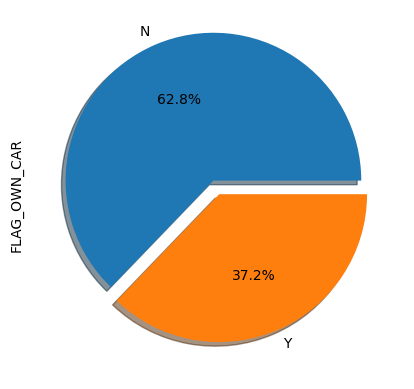

In [22]:
enriched_flags_client_df['FLAG_OWN_CAR'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')
# Seems that ~63% of the clients doesn't own a car...

- About 63% of clients doesn't own car
- About 37% of clients own car

<AxesSubplot: ylabel='CNT_CHILDREN'>

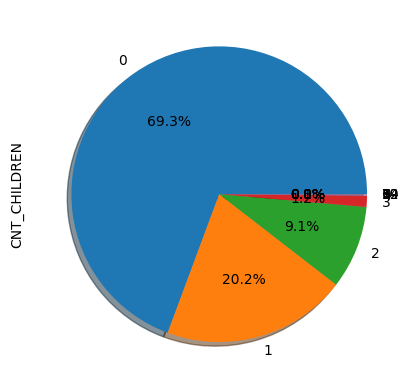

In [23]:
enriched_demographics_client_df['CNT_CHILDREN'].value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%')
# ~70% doesn't have even a child

- About 70% of clients have no children
- About 20% of clients have one child
- About 9% of clients have two children
- About 1% of clients have three or more children

In [24]:
# Let's deep dive into the values
enriched_demographics_client_df['CNT_CHILDREN'].value_counts()

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

### merging enriched_demographics_client and enriched_flags_client

In [25]:
df2 = enriched_demographics_client_df.merge(enriched_flags_client_df,
                                            how = 'inner', on=['ID'])                                   
                                            

### columns of merged dataframe of enriched_demographics_client and enriched_flags_client

In [26]:
df2.columns

Index(['ID', 'CODE_GENDER', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL'],
      dtype='object')

### full dataframes merge

In [27]:
df_final = df.merge(df2, how = 'inner', on =['ID'])

### df_final information about columns, datatypes, null and non-null values

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155516 entries, 0 to 155515
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAYS_EMPLOYED        155516 non-null  int64  
 1   NAME_FAMILY_STATUS   155516 non-null  object 
 2   DAYS_BIRTH           155516 non-null  int64  
 3   NAME_HOUSING_TYPE    155516 non-null  object 
 4   ID                   155516 non-null  int64  
 5   NAME_EDUCATION_TYPE  155516 non-null  object 
 6   OCCUPATION_TYPE      107666 non-null  object 
 7   AMT_INCOME_TOTAL     155516 non-null  float64
 8   NAME_INCOME_TYPE     155516 non-null  object 
 9   MONTHS_BALANCE       155516 non-null  int64  
 10  STATUS               155516 non-null  object 
 11  CODE_GENDER          155516 non-null  object 
 12  CNT_CHILDREN         155516 non-null  int64  
 13  CNT_FAM_MEMBERS      155516 non-null  int64  
 14  FLAG_OWN_CAR         155516 non-null  object 
 15  FLAG_OWN_REALTY  

In [29]:
#final merged dataframe columns
df_final.columns

Index(['DAYS_EMPLOYED', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH',
       'NAME_HOUSING_TYPE', 'ID', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'MONTHS_BALANCE', 'STATUS',
       'CODE_GENDER', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL'],
      dtype='object')

### checking for duplicates in df_final

In [30]:
df_final.duplicated().sum()

0

## Family status vs age

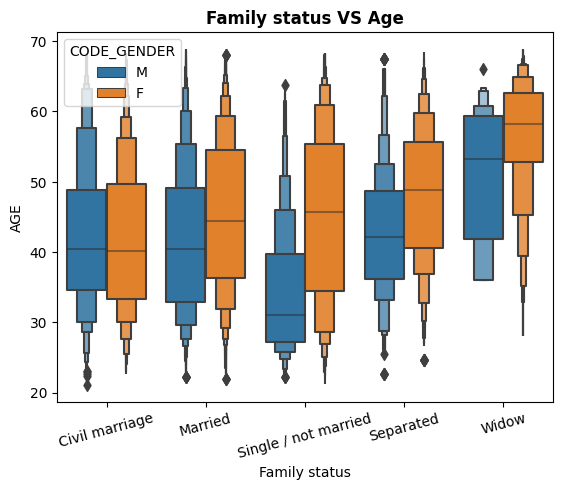

In [31]:
df_final['AGE'] = -df_final['DAYS_BIRTH']/365
bin1 = df_final['AGE']//10
sns.boxenplot(data=df_final, x='NAME_FAMILY_STATUS', y='AGE',hue='CODE_GENDER')
plt.title('Family status VS Age', fontweight='bold')
plt.xlabel('Family status')
plt.xticks(rotation=15);

- The boxen plot shows distribution of male and female clients in family status
- Most of Male clients in Civil marriage are between age of 35 years and about 50 years with an average of around 40 years
- Most of Female clients in Civil marriage marriage are between age of about 33 years and 50 years with an average of approximately 40 years
- Most of Both Male and Female clients that are married are between age of 32 years and about 50 years, 35 years to 55 years with an average of about 40 years for Male clients and about 45 years for Female clients
- Most of Male clients that are Single are between 25 to 40 years, Most of Female Single clients are between 35 to 57 years with an average about 30 years for Male and 45 years for Female
- Most of Male clients that are Seperated are between 35 to 50 years, Most of Female Single clients are between 40 to 55 years with an average about 40 years for Male and 50 years for Female
- Most of Male clients that are Widow are between 40 to 60 years, Most of Female Single clients are between 50 to 65 years with an average about 55 years for Male and 57 years for Female

## Distribution of Gender in Occupations

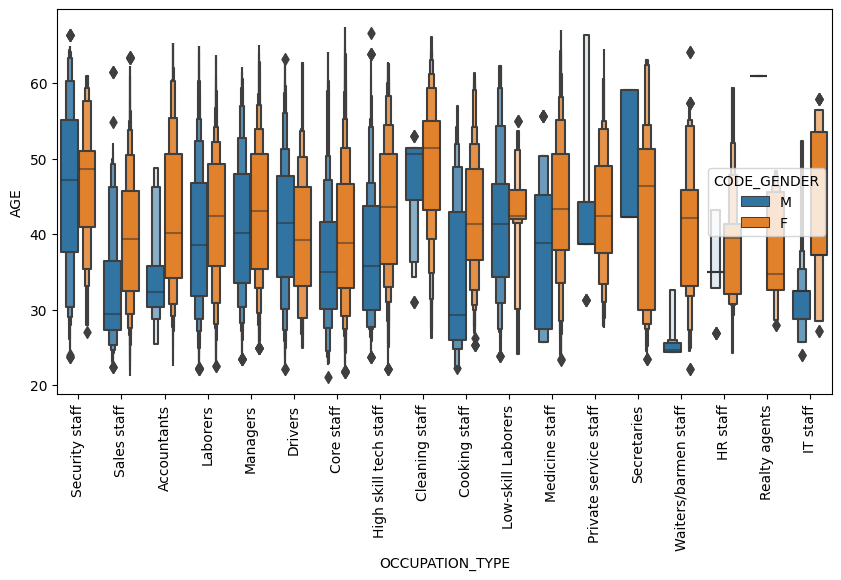

In [32]:
plt.figure(figsize=(10,5))
bin1 = df_final['AGE']//10
sns.boxenplot(data=df_final, x='OCCUPATION_TYPE', y='AGE',hue='CODE_GENDER')
plt.xticks(rotation=90);

- All ages Male clients can be seen as security staff
- All ages Female clients can be seen as secretaries
- Only Male clients below 30 years work as waiters/barmen staff
- All ages Female clients are distributed across every profession

## Relation between housing type and realty

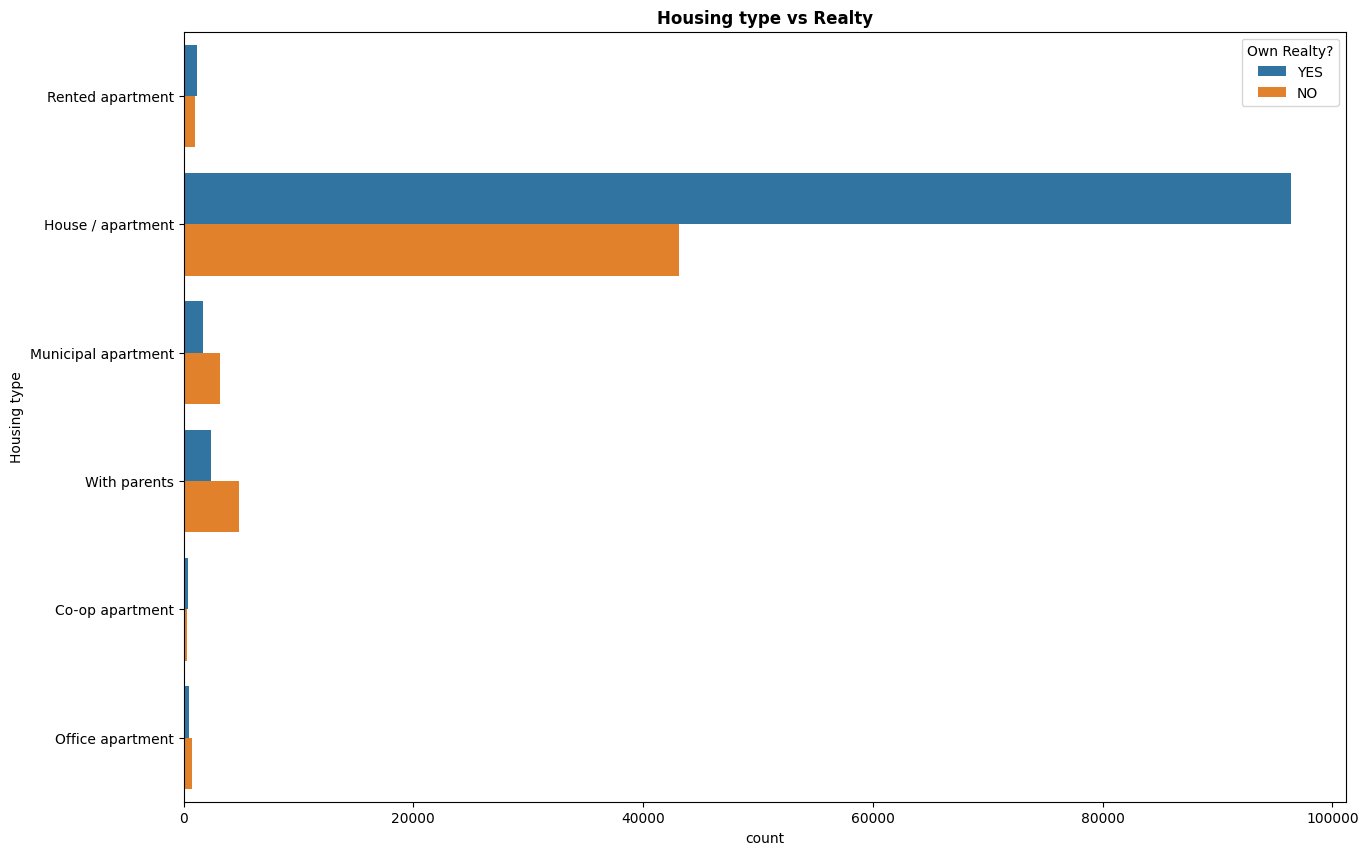

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_final,y='NAME_HOUSING_TYPE',hue = 'FLAG_OWN_REALTY')
plt.title('Housing type vs Realty',fontweight='bold')
plt.xlabel('count')
plt.ylabel('Housing type')
plt.legend(title='Own Realty?',labels = ['YES','NO']);

- large amount of people who own realty (appx. 100000) and who doesn't own realty (appx. 50000) are in House/ appartment
- small amount of people who own realty (appx. less than 5000) and who doesn't own realty (appx. less than 5000) are in co-apartment

## Distribution of income & average income of clients

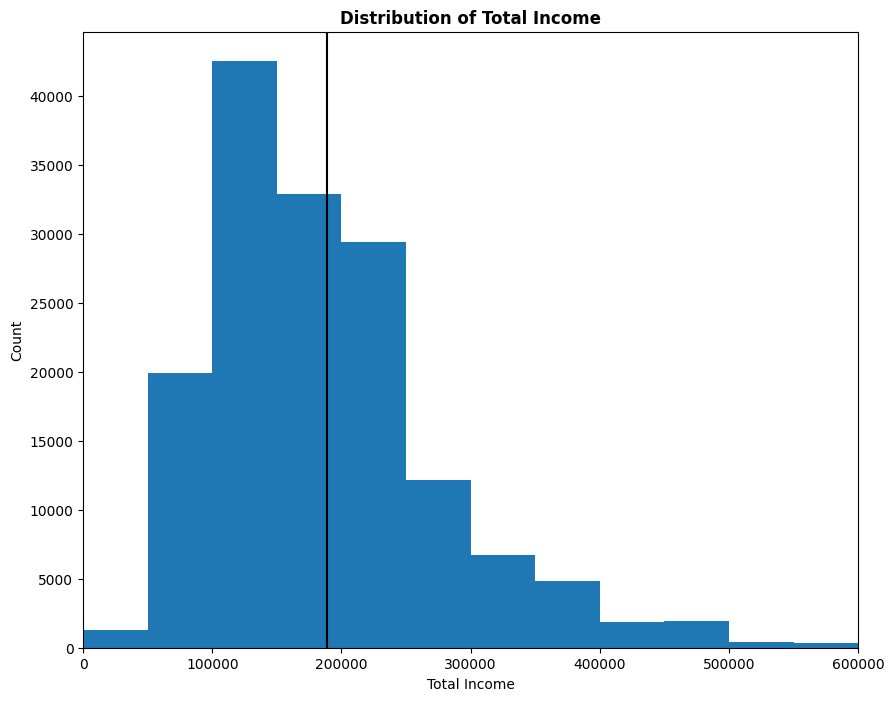

In [34]:

bins = np.arange(0,df_final['AMT_INCOME_TOTAL'].max()+50000,50000)
plt.figure(figsize=(10,8))
plt.hist(data = df_final,x='AMT_INCOME_TOTAL',bins = bins)

plt.axvline(df_final['AMT_INCOME_TOTAL'].mean(), color = 'k')
plt.xlim(0,600000)
plt.title('Distribution of Total Income',fontweight = 'bold')
plt.xlabel('Total Income')
plt.ylabel('Count');

- The average total income of all the clients is approximately 188732 USD and large quantity of clients meet this category

## Distribution of Own Realty among gender

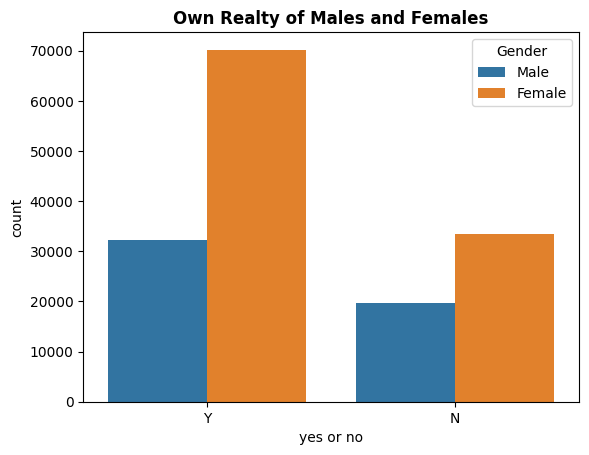

In [35]:

sns.countplot(data = df_final, x='FLAG_OWN_REALTY', hue ='CODE_GENDER')
plt.title('Own Realty of Males and Females',fontweight = 'bold')
plt.xlabel('yes or no')
plt.legend(title='Gender',labels=['Male','Female']);

- Approximately 70000 Female clients and 30000 Male clients own realty
- Approximately 30000 Female clients and 20000 Male clients doesn't own realty

## df_final dataframe statistics

In [36]:
df_final.describe()

,DAYS_EMPLOYED,DAYS_BIRTH,ID,AMT_INCOME_TOTAL,MONTHS_BALANCE,CNT_CHILDREN,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,AGE
count,155516.000000,155516.000000,1.555160e+05,1.555160e+05,155516.000000,155516.000000,155516.000000,155516.0,155516.000000,155516.000000,155516.000000,155516.000000
mean,57979.883877,-16128.414440,5.078752e+06,1.887320e+05,-19.400730,0.429737,2.209663,1.0,0.231725,0.300664,0.092228,44.187437
std,136649.355725,4104.415944,4.182775e+04,1.016551e+05,14.084104,0.749057,0.910734,0.0,0.421936,0.458548,0.289349,11.244975
min,-15713.000000,-25152.000000,5.008804e+06,2.700000e+04,-60.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,21.109589
25%,-3282.000000,-19482.000000,5.044675e+06,1.224000e+05,-29.000000,0.000000,2.000000,1.0,0.000000,0.000000,0.000000,34.838356
50%,-1680.000000,-15749.000000,5.074593e+06,1.620000e+05,-17.000000,0.000000,2.000000,1.0,0.000000,0.000000,0.000000,43.147945
75%,-431.000000,-12716.000000,5.115548e+06,2.250000e+05,-8.000000,1.000000,3.000000,1.0,0.000000,1.000000,0.000000,53.375342
max,365243.000000,-7705.000000,5.150487e+06,1.575000e+06,0.000000,19.000000,20.000000,1.0,1.000000,1.000000,1.000000,68.909589


## Relationship of occupation, education with income

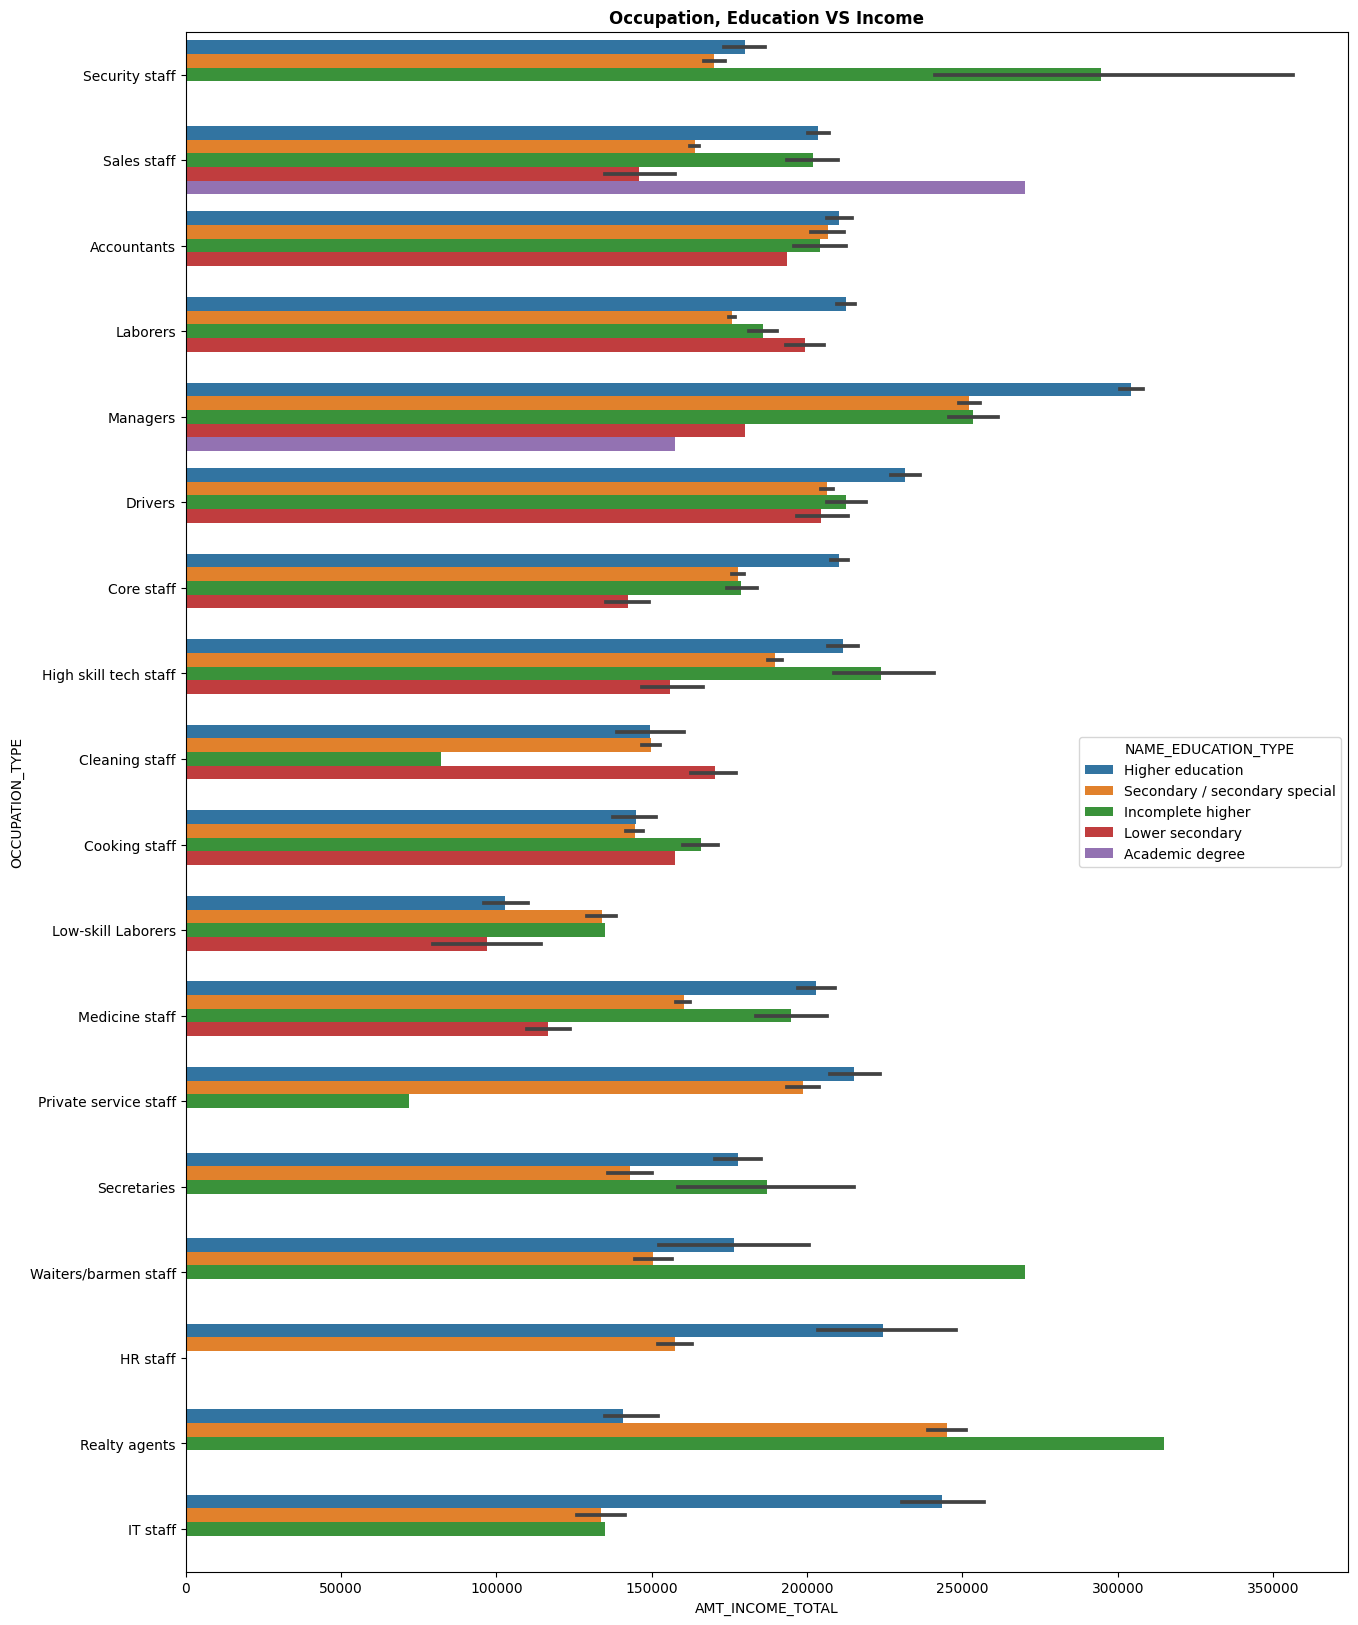

In [37]:

plt.figure(figsize=(15,20))
sns.barplot(data = df_final, y='OCCUPATION_TYPE',x='AMT_INCOME_TOTAL',hue='NAME_EDUCATION_TYPE')
plt.title('Occupation, Education VS Income', fontweight = 'bold');

- Most security staff, Realty agents, waiters/barmen, cooking staff, low skill laborers, secretaries and High skill tech staff has incomplete secondary education
- Most sales staff has Academic degree
- Most accountants, laborers, managers, Drivers, core staff, Medicine staff, Private service staff, Hr staff and IT staff  has higher education
- Most Cleaning staff has Lower secondary education

## Relation between Number of children vs Status type

In [38]:
df_final['NAME_INCOME_TYPE'].value_counts()

Working                 79980
Commercial associate    36502
Pensioner               25749
State servant           13212
Student                    73
Name: NAME_INCOME_TYPE, dtype: int64

''

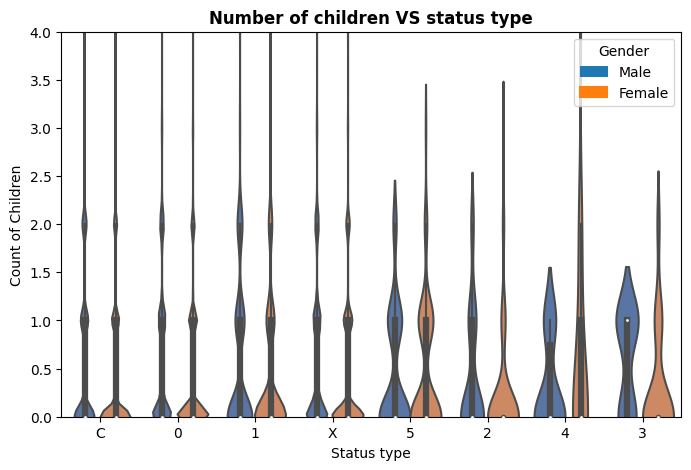

In [39]:
plt.figure(figsize=(8,5))
ax = sns.violinplot(data=df_final, y= 'CNT_CHILDREN',  x='STATUS' , hue = 'CODE_GENDER',palette='deep');
plt.ylim(0,4)
plt.title('Number of children VS status type',fontweight='bold')
plt.xlabel('Status type')
plt.ylabel('Count of Children')
plt.legend(title='Gender',labels=['Male','Female'])
leg = ax.get_legend()
leg.legendHandles[0].set_color(sns.color_palette()[0])
leg.legendHandles[1].set_color(sns.color_palette()[1])
;

- Status 0 clients both Male and Female has average of 1 child
- Status 1 clients both Male and Female has average of appx. 2 children
- Status 2 clients both Male and Female has average of appx. 2 children
- Status 3 clients both Male and Female has average of appx. 2 children
- Status 4 clients both Male and Female has average of appx. 2 children
- Status 5 clients both Male and Female has average of 2 children
- Status C clients both Male and Female has average of 1 child
- Status X clients both Male and Female has average of 1 child

## Correlations of df_final

In [40]:

df_final.corr()

,DAYS_EMPLOYED,DAYS_BIRTH,ID,AMT_INCOME_TOTAL,MONTHS_BALANCE,CNT_CHILDREN,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,AGE
DAYS_EMPLOYED,1.000000,-0.609119,-0.020017,-0.177674,0.001785,-0.229865,-0.226185,NaN,-0.244128,-0.015761,-0.083085,0.609119
DAYS_BIRTH,-0.609119,1.000000,0.039543,0.077498,0.030489,0.356992,0.326405,NaN,0.180135,-0.025800,0.099459,-1.000000
ID,-0.020017,0.039543,1.000000,-0.028635,0.004526,0.026863,0.025455,NaN,0.082006,0.003891,-0.059184,-0.039543
AMT_INCOME_TOTAL,-0.177674,0.077498,-0.028635,1.000000,0.000821,0.037266,0.031311,NaN,-0.021400,0.018796,0.090549,-0.077498
MONTHS_BALANCE,0.001785,0.030489,0.004526,0.000821,1.000000,-0.001768,-0.009362,NaN,-0.000227,-0.003377,0.006627,-0.030489
CNT_CHILDREN,-0.229865,0.356992,0.026863,0.037266,-0.001768,1.000000,0.892508,NaN,0.039359,-0.019838,0.016682,-0.356992
CNT_FAM_MEMBERS,-0.226185,0.326405,0.025455,0.031311,-0.009362,0.892508,1.000000,NaN,0.057302,-0.007505,0.016149,-0.326405
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.244128,0.180135,0.082006,-0.021400,-0.000227,0.039359,0.057302,NaN,1.000000,0.315733,-0.039483,-0.180135
FLAG_PHONE,-0.015761,-0.025800,0.003891,0.018796,-0.003377,-0.019838,-0.007505,NaN,0.315733,1.000000,0.012677,0.025800


## Correlation Heatmap

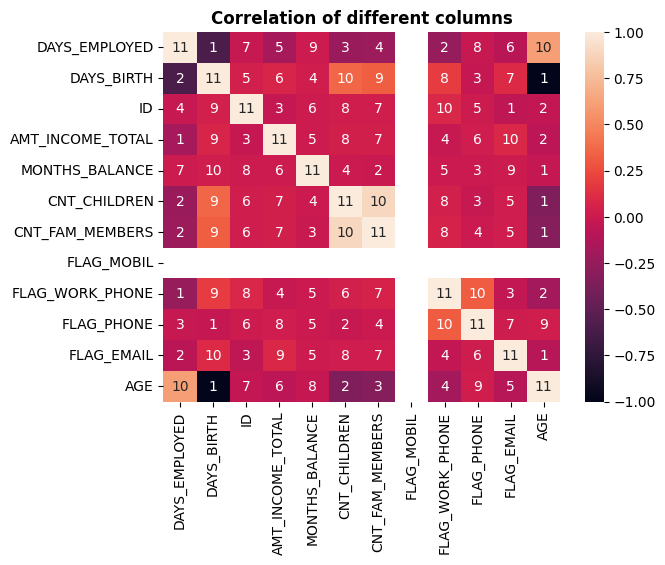

In [41]:

sns.heatmap(data=df_final.corr(),annot=df_final.corr().rank(axis='columns'))
plt.title('Correlation of different columns',fontweight='bold');

- Strong positive correlation between days_employed and Age
- Weak correlation between Months_balance and days_birth
- Strong positive correlation between cnt_chidren and cnt_fam_members 

## Distribution of income, children, family members, days employed and gender

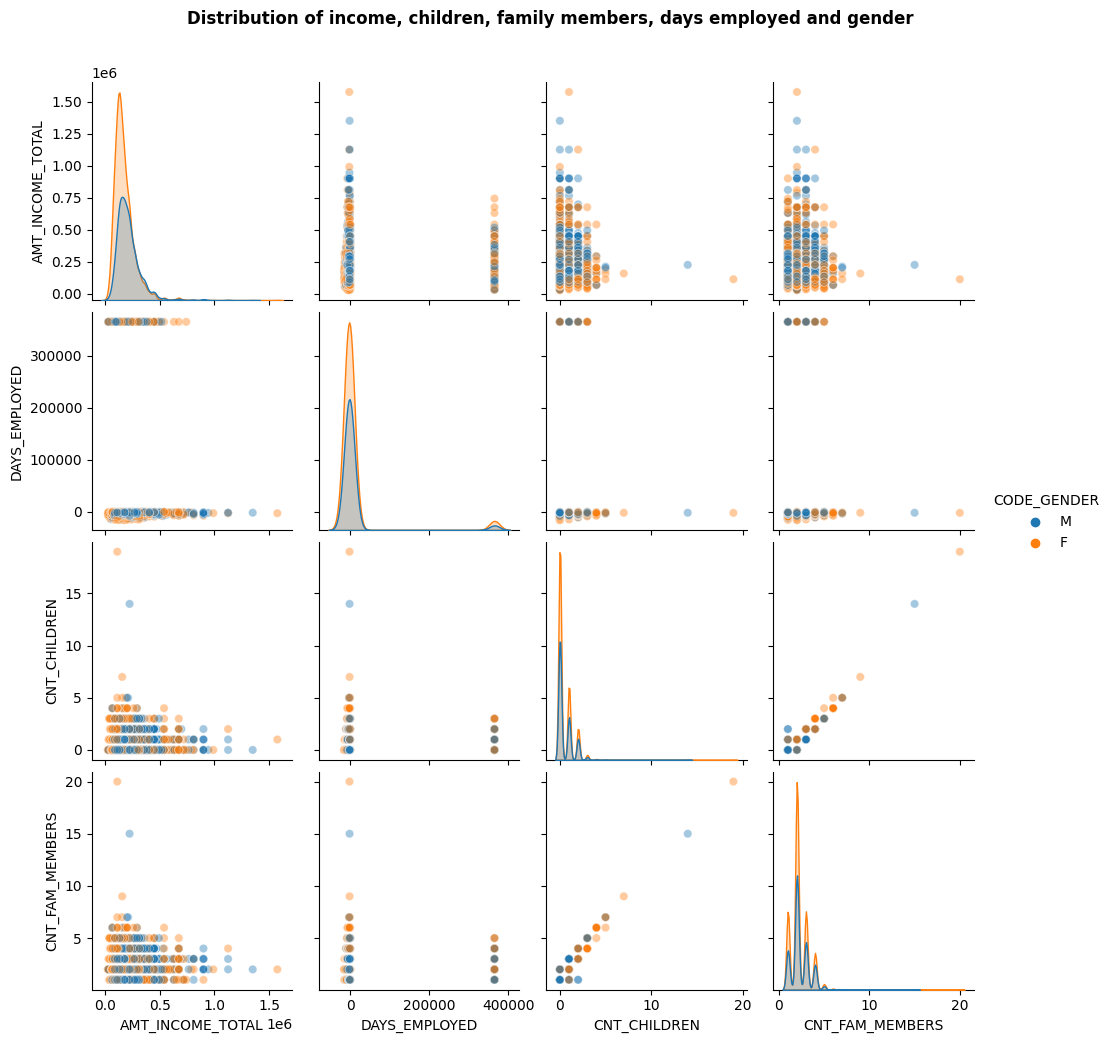

In [42]:
#sub dataframe and removing duplicates if any
df_final_pairplot = df_final[['AMT_INCOME_TOTAL','DAYS_EMPLOYED','CNT_CHILDREN','CNT_FAM_MEMBERS','CODE_GENDER']]
df_final_pairplot.drop_duplicates(inplace=True)

g = sns.pairplot(df_final_pairplot,hue='CODE_GENDER',plot_kws={'alpha':0.4})
g.fig.suptitle('Distribution of income, children, family members, days employed and gender',fontweight='bold',y = 1.04);

- Most clients have about below 5 family members with their income ranging densly up to 100000 USD
- The number of kids of clients is directly proportional to number of family members

## Distribution of Gender among Income types

In [43]:
df_final['NAME_INCOME_TYPE'].value_counts()

Working                 79980
Commercial associate    36502
Pensioner               25749
State servant           13212
Student                    73
Name: NAME_INCOME_TYPE, dtype: int64

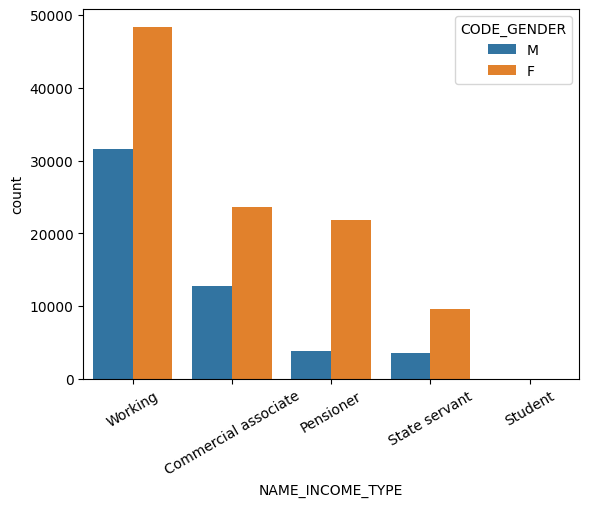

In [44]:
sns.countplot(data = df_final, x= 'NAME_INCOME_TYPE', hue='CODE_GENDER')
plt.xticks(rotation=30);

- Most Female clients have working income appx. 50000
- Most Male clients have working income appx. 32000
- Commercial associate Female clients are appx. 25000 and Male clients are appx. 15000
- Pensioner Female clients are appx. 23000 and Male clients are appx. 5000
- State servent Female clients are appx. 10000 and Male clients are below 5000
- There is a minimal amount of students combining both Male and Female clients i.e appx. 73

## Profiling categorical variables to determine correlation

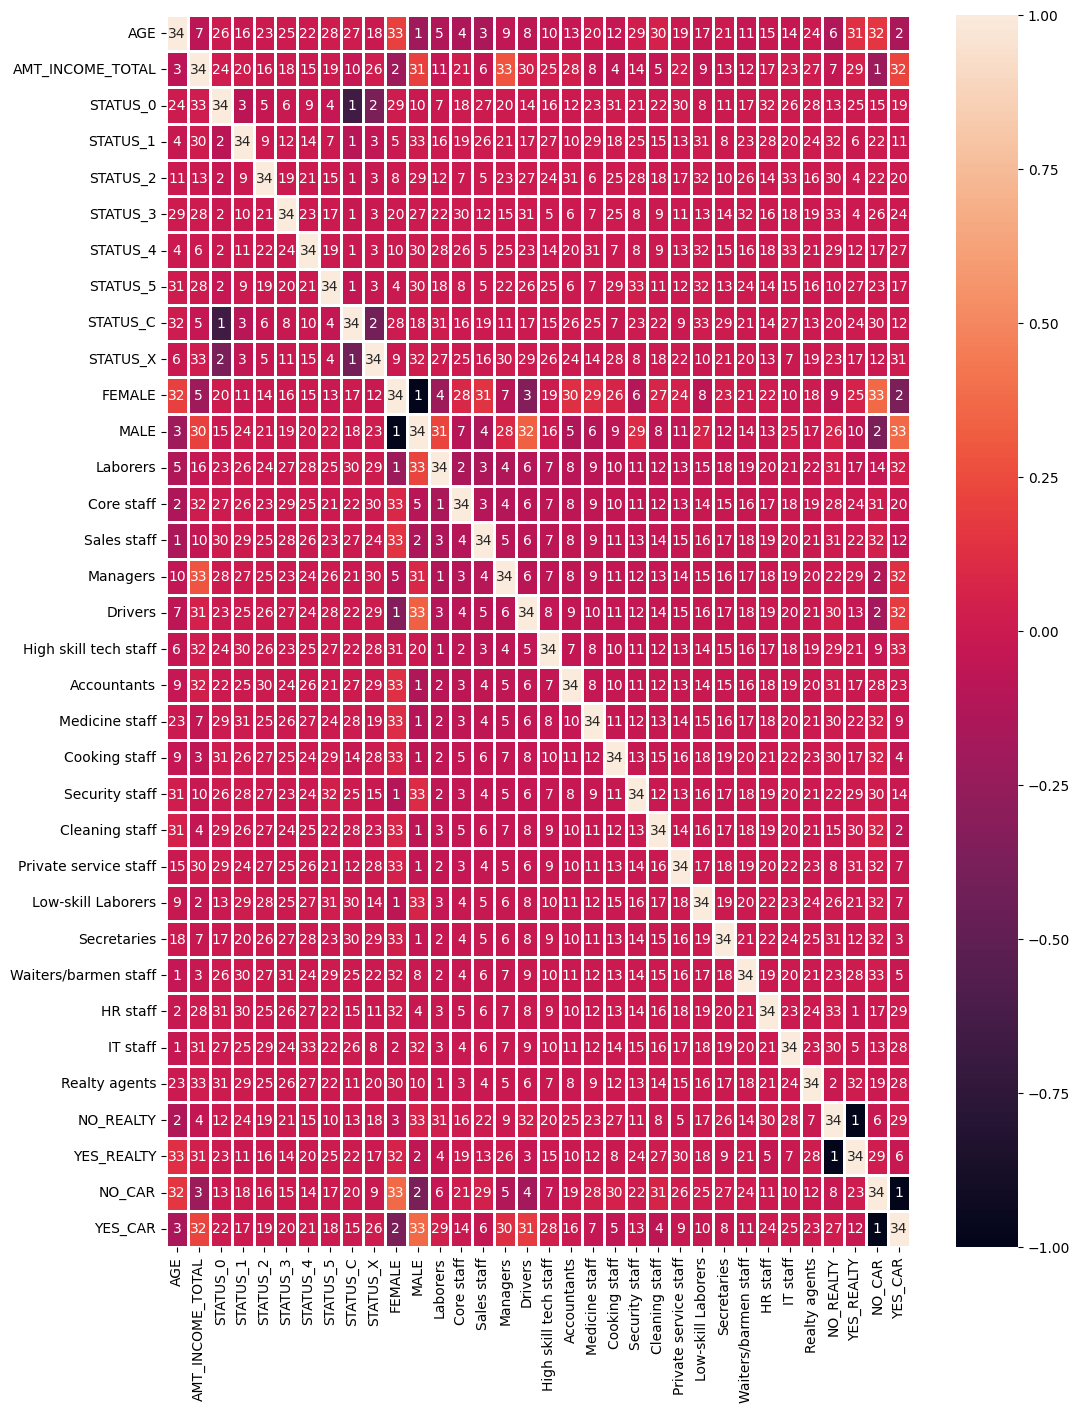

In [45]:

df_graph = df_final[['AGE','STATUS','CODE_GENDER','AMT_INCOME_TOTAL','OCCUPATION_TYPE','FLAG_OWN_REALTY', 'FLAG_OWN_CAR']]
df_graph['FLAG_OWN_REALTY']. replace({'Y':1, 'N':0},inplace=True)
df_graph['FLAG_OWN_CAR']. replace({'Y':1, 'N':0},inplace=True)
df_graph['CODE_GENDER']. replace({'M':1, 'F':0},inplace=True)
df_graph['STATUS']. replace({'1':1, '0':0,'2':2,'3':3,'4':4,'5':5,'C':6,'X':7},inplace=True)
df_graph['OCCUPATION_TYPE'].replace({'Laborers' :0, 'Core staff':1,'Sales staff' :2, 'Managers':3,               
                                     'Drivers':4,'High skill tech staff':5, 'Accountants':6,'Medicine staff':7 ,           
                                     'Cooking staff':8,'Security staff':9,'Cleaning staff':10,'Private service staff':11,      
                                     'Low-skill Laborers' :12, 'Secretaries':13,'Waiters/barmen staff' :14,      
                                     'HR staff':15,'IT staff':16,'Realty agents':17 },inplace=True)

df_graph = pd.get_dummies(df_graph,columns=['STATUS','CODE_GENDER','OCCUPATION_TYPE','FLAG_OWN_REALTY','FLAG_OWN_CAR'])

df_graph = df_graph.rename(columns={'STATUS_6':'STATUS_C','STATUS_7':'STATUS_X','FLAG_OWN_REALTY_0':'NO_REALTY',
                                    'FLAG_OWN_REALTY_1':'YES_REALTY',
                                    'FLAG_OWN_CAR_0':'NO_CAR','FLAG_OWN_CAR_1':'YES_CAR','CODE_GENDER_0':'FEMALE',
                                    'CODE_GENDER_1':'MALE','OCCUPATION_TYPE_0.0':'Laborers' , 'OCCUPATION_TYPE_1.0': 'Core staff',
                                    'OCCUPATION_TYPE_2.0': 'Sales staff','OCCUPATION_TYPE_3.0':'Managers' ,
                                    'OCCUPATION_TYPE_4.0':'Drivers' , 'OCCUPATION_TYPE_5.0': 'High skill tech staff',
                                    'OCCUPATION_TYPE_6.0': 'Accountants','OCCUPATION_TYPE_7.0':'Medicine staff' , 
                                    'OCCUPATION_TYPE_8.0': 'Cooking staff', 'OCCUPATION_TYPE_9.0': 'Security staff',
                                    'OCCUPATION_TYPE_10.0':'Cleaning staff' ,'OCCUPATION_TYPE_11.0':'Private service staff' ,
                                    'OCCUPATION_TYPE_12.0': 'Low-skill Laborers' , 'OCCUPATION_TYPE_13.0': 'Secretaries',
                                    'OCCUPATION_TYPE_14.0': 'Waiters/barmen staff' ,'OCCUPATION_TYPE_15.0': 'HR staff' ,
                                    'OCCUPATION_TYPE_16.0':'IT staff' , 'OCCUPATION_TYPE_17.0': 'Realty agents'
                                    })


fig = plt.figure(figsize=(12,16))
ax = sns.heatmap(data = df_graph.corr(), annot = df_graph.corr().rank(axis='columns') ,linewidth=1)
plt.savefig('heatmap.png')
plt.show()


- Strong positive correlation between Age and yes_realty
- Strong positive correlation between Amt_income_total and Managers 
- Strong positive correlation between Female clients and no_car
- Strong positive correlation between Male clients and yes_car, male clients and drivers
- Strong negative correlation between Female clients and drivers

## Summary

   The given dataset describes bank clients.The dataset consists of 4 dataframes credit_record_df, application_record_df, enriched_demographics_client_df, enriched_flags_client_df. These dataframes are inner joined on 'ID' to form a final dataframe df_final. df_final consists of 155516 entries with 21 columns: ['DAYS_EMPLOYED', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH',  'NAME_HOUSING_TYPE', 'ID', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE','AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'MONTHS_BALANCE', 'STATUS','CODE_GENDER', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE','FLAG_EMAIL']

## Recommendations

Based on the SQL operations performed above along with Tableau data and the deep-dive analysis using python, the following are the recommendations:

- Most of the people who own Realty own House/Apartment
- The relation between number of family members and number of children is strong positive correlation.
- status type C,X,0,1 have average number of children below 1 and the status type 2,3,4,5 have an average number of children between 1.5 to 2.
- clients with Higher education and Managers earn more than 3 million
- clients that are Real estate with incomplete higher education earn around 3.5 million

- Security staff with incomplete higher education has around 3 Million of income in total
- Sales staff with Academic degree earn around 2.5 million of income in total
- Laborers have higher education that earn around 2 million income in total
- Drivers with higher education earn around 2.5 million income in total
- Core staff, Medicine staff, Private service staff with higher education earn around 2 million income and IT staff , HR staff with higher education earn 2.5 million income in total per year
- Around 70000 of realty is owned by Female clients where as 30000 of realty is owned by Male clients
- The average total income of clients is around 2 million per year and when excluded No occupation clients, it become around 4 million per year


- The clients with secondary education has lowest income with most number of clients i.e, 279,978.
- Private sector staff has most negaative months balance with 60-89 days past due of credits.
- The clients with secondary level of education and are married contribute 42.92% of average income total.


## Conclusions

Based on the SQL operations performed above along with Tableau data and the deep-dive analysis using python, the following are the conclusions:

- Based on, Gender with respect to income earned,Female clients earn more when compared to Male clients
- Also, Female clients were employed more days than Male clients
- Single/not married clients ranges from 20 to 70 years
- There is a strong correlation between number of days employed, age and months balance
- Widow clients both male and female range from 30 to 70 years of age
- 70% of clients have no children 
- 63% of clients have no car
- Bank clients : 438510,Higher Education percentage : 26.80%, Secondary Education percentage : 68.82%, Clients with Two or more kids : 3389, Clients with Car & Realty percentage : 1.89%, Female clients percentage : 4.98%, Male Clients percentage** : 2.46%
- There are most female clients i.e, 149,415 that has 2 family members and no kids.
- Married clients contribute to 66.14% with both car and no car category.
-  Car : Female clients 16,184 with no car and 5,673 with car.
 		Male clients 3,912 with no car and 6,876 with car
- Realty : Female clients 14,998 with Realty and 6,859 with no Realty
 		   Male clients 6,847 with Realty and 3,941 with no Realty
- Education Type : Female clients 14,799 with secondary education and 23 with Academic degree,
 		           Male clients 7,295 with secondary education and 122 lower secondary education
- Family status : Female clients 14,365 are married and 1,311 are widow,
 		          Male clients 8,239 are married and 24 are widow
- Housing Type : Female clients 19,825 are in House/Appartment and 67 are in Co-op Apartment,
 		         Male clients 9,322 are in House/Appartment and 71 are in Co-op Apartment
- Occupation Type: Female clients 2,666 are in sales staff and 25 are IT staff, 
 		           Male clients 3,183 are in laborer and 5 are in secretaries
- Income level: Female clients 20,049 are in <=300,000 income and 6 are in >=1,200,000 income,
 		        Male clients 9,049 are in <=300,000 income and 6 are in >=1,200,000 income
- Children: Female clients 15,719 are in No kids and 275 are in 3 or more kids,
 		    Male clients 6,827 are in No kids and 175 are in 3 or more kids

-  Clients that are Single/not married have average income of around 1600K with status 0:1-29 days past due, No loan and credit paid off.
- Clients that are in Civil marriage have low incomw with less than 200K with status 0 : 1-29 days past due, 1 : 30-59 days past due, 2 : 60-89 days past due, 3 : 90-119 days past due, 4 : 120-149 days past due, 5 : >150 days past due, X : No loan, C : Paid off